# Prosper Loan Analysis
## by Bala Peri

## Investigation Overview

> In this investigation,I wanted to look at the different factors  that affects the borrower's loan.The main feature of interest is borrower's APR,how it changes with different loan features.

## Dataset Overview

> The Dataset contains 113,917 loans, each row has infomation on the borrow's APR, borrow's rate, prosperscore, debt, etc.The  prosperscore column is filtered for not null and all other rows were dropped for missing values and data inconsistencies.The below plots are anaysed for 84853 rows of data.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_prosper_data=pd.read_csv("prosperLoanData.csv")
df_prosper_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#filter out loans with prosperscores not null
df_prosper_data1=df_prosper_data[df_prosper_data['ProsperScore'].isnull()==False]
df_prosper_data1.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


## Distribution of Borrower's APR

> Borrower's APR in the dataset takes from a range of values lowest .05% to highest  .42%.From range .05-.34% ,the graph shows unimodal shape,except on those 0.35797% and 0.35643%,where the borrowers count spiked high.

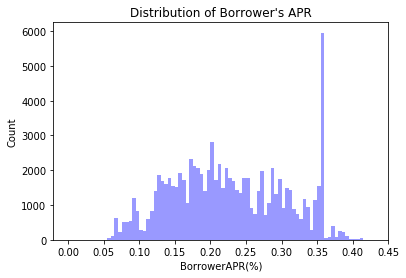

In [5]:
# plot for borrowers apr
bin_size=np.arange(0,df_prosper_data1['BorrowerAPR'].max(),.005)
#bin_size
sb.distplot(df_prosper_data1['BorrowerAPR'],bins=bin_size,kde=False,color='b')
plt.xticks(np.arange(0,df_prosper_data1['BorrowerAPR'].max()+.05,.05))
plt.title("Distribution of Borrower's APR")
plt.xlabel('BorrowerAPR(%)')
plt.ylabel('Count');

## Distribution between Borrower's APR and Prosperscore

> From the dataset,each borrower is given a prosperscore.From the below plots,it can be observed that borrower's APR is low for higher prosperscore,which indicates that borrower's APR and prosperscore are negative correlated to each other,which is also a strongest indicator for the analysis.

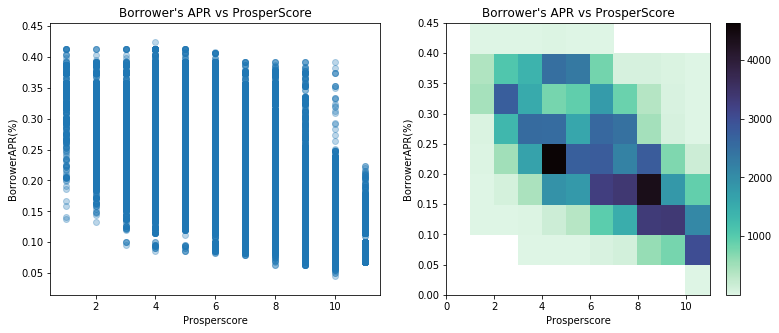

In [6]:
#plot scatter plot and heatmap
plt.figure(figsize=[13,5])

plt.subplot(1,2,1)
plt.scatter(data=df_prosper_data1,x='ProsperScore',y='BorrowerAPR',alpha=.3)
plt.title("Borrower's APR vs ProsperScore")
plt.xlabel('Prosperscore')
plt.ylabel('BorrowerAPR(%)')

plt.subplot(1,2,2)
bin_x=np.arange(0,df_prosper_data1['ProsperScore'].max()+1,1)
bin_y=np.arange(0,df_prosper_data1['BorrowerAPR'].max()+.05,.05)
plt.hist2d(data=df_prosper_data1,x='ProsperScore',y='BorrowerAPR',bins=[bin_x,bin_y],cmin=.01,cmap='mako_r')
plt.colorbar()
plt.title("Borrower's APR vs ProsperScore")
plt.xlabel('Prosperscore')
plt.ylabel('BorrowerAPR(%)');




## Borrower's APR by Prosperscore for selected ProsperRating

The prosperrating is given high for high prosperscore and viceversa.So from the below plots,it is evident that ,borrowers with low prosper rating 'HR' has high APR,while borrwers with high prosperrating 'AA' pays low APR.
so High prosperrating low APR and viceversa.

In [7]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0,df_prosper_data1['ProsperScore'].max()+1,1)
    bins_y= np.arange(0,df_prosper_data1['BorrowerAPR'].max()+.05,.05)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.1)
    plt.xticks(np.arange(0,df_prosper_data1['ProsperScore'].max(),1))
    plt.yticks(np.arange(0,df_prosper_data1['BorrowerAPR'].max(),.05))

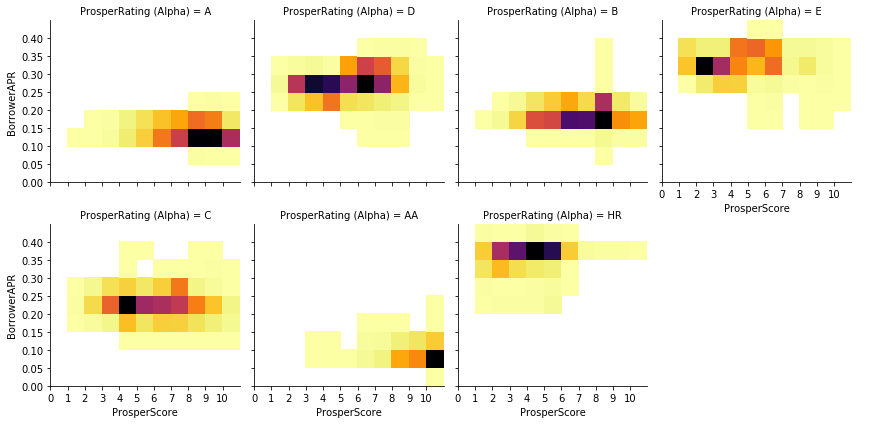

In [8]:
#create faceted heatmaps on propsperratings
g=sb.FacetGrid(data=df_prosper_data1,col='ProsperRating (Alpha)',col_wrap=4,size=3)
g.map(hist2dgrid,'ProsperScore','BorrowerAPR',color = 'inferno_r')
g.add_legend();